## Kütüphanelerin içe aktarılması

In [62]:
# !pip install tensorflow
# !pip install keras
import tensorflow as tf
import numpy as np

In [63]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential, load_model
from keras.layers import Dense
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Veri setinin hazırlanması ve preprocessing

In [170]:
# mnist veri setini yükle, eğitim ve test seti olarak
(x_train,y_train), (x_test,y_test) = mnist.load_data()
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

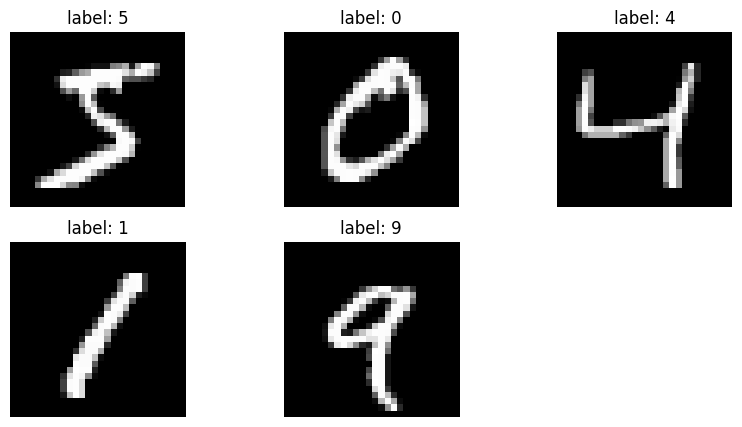

In [171]:
plt.figure(figsize = (10,5))
for i in range(5):
    plt.subplot(2,3, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"label: {y_train[i]}")
    plt.axis("off")

plt.show()

In [122]:
# veri setinin normalize edelim, 0-255 aralığındaki pixel değerlerini 0-1 arasına ölçeklendiriyoruz.

x_train = x_train.reshape(-1,28*28).astype("float")/255
x_test = x_test.reshape(-1,28*28).astype("float")/255

# etiketleri kategorik hale çeviriyoruz (0-9 rakamları one-hot encoding yapıyoruz)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [123]:
x_train.shape,x_test.shape

((60000, 784), (10000, 784))

In [124]:
np.max(x_train),np.min(x_train)

(1.0, 0.0)

## ANN modelinin oluşturulması ve derlenmesi

In [125]:
model = Sequential()

# ilk katman: 512 cell, Relu Activation function, input size 28*28=784
model.add(Dense(512, activation="relu", input_shape = (28*28,)))

# ikinci katman: 256 cell, activation:relu
model.add(Dense(256, activation="relu"))

# output layer: 10 , activation:softmax
model.add(Dense(10, activation = "softmax"))

In [126]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [127]:
# Model derlemesi: optimizer(adam: büyük veri ve kompleks ağlar için idealdir)
# model derlemesi: loss(categorical_crossentropy)
# model derlemesi: metric(accuracy)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

## Callback'lerin tanımlanması ve ANN eğitilmesi

In [136]:
# Callback'lerin tanımlanması ve ANN eğitilmesi

# Erken durdurma: eğer val_loss iyileşmiyorsa eğitimi durduralım
early_stopping = EarlyStopping(monitor="val_loss",patience=5 ,restore_best_weights=True)

# model checkpoint en iyi modelin ağırlıklarını kaydeder
checkpoint = ModelCheckpoint(filepath="ann_best_model.keras", monitor="val_loss", save_best_only=True)

# model training: 10 epochs, batch size 64, validation set orani %20
history = model.fit(x_train, y_train, epochs = 20, batch_size=64, validation_split=0.2, callbacks=[early_stopping, checkpoint])

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9807 - loss: 0.0588 - val_accuracy: 0.9728 - val_loss: 0.1005
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9903 - loss: 0.0299 - val_accuracy: 0.9762 - val_loss: 0.0861
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9940 - loss: 0.0177 - val_accuracy: 0.9747 - val_loss: 0.1050
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9927 - loss: 0.0208 - val_accuracy: 0.9783 - val_loss: 0.0944
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9950 - loss: 0.0157 - val_accuracy: 0.9750 - val_loss: 0.1112
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9944 - loss: 0.0161 - val_accuracy: 0.9788 - val_loss: 0.0925
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9962 - loss: 0.0103 - val_accuracy: 0.9760 - val_loss: 0.1186


## Model evalutaion, görselleştirme, model kaydetme ve yükleme 

In [137]:
# test verisi ile model performansı değerlendirme
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size = 64, callbacks=[early_stopping, checkpoint])

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9747 - loss: 0.0863


In [138]:
print(f"Test Accuracy: {test_acc:.2f}, Test Loss: {test_loss:.2f}")

Test Accuracy: 0.98, Test Loss: 0.07


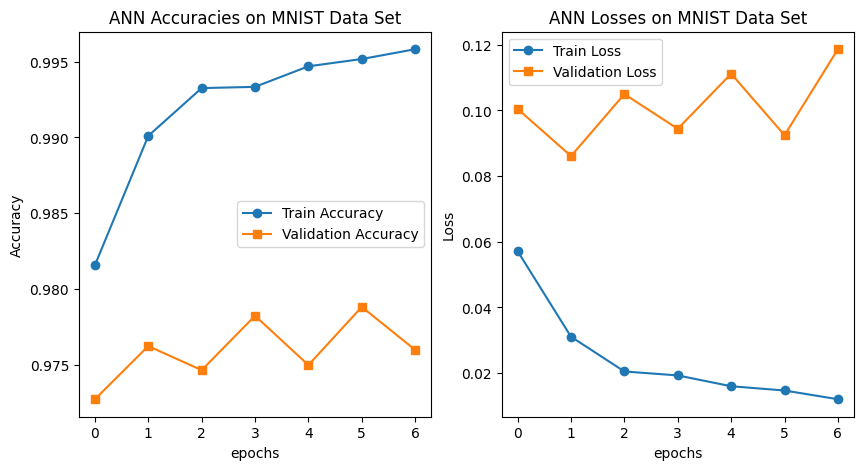

In [160]:
# training and validation accuracy görselleştirme
fig,ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(history.history["accuracy"], "o-", label="Train Accuracy")
ax[0].plot(history.history["val_accuracy"], "s-", label="Validation Accuracy")
ax[0].set_title("ANN Accuracies on MNIST Data Set")
ax[0].set_xlabel("epochs")
ax[0].set_ylabel("Accuracy")
ax[0].legend()

ax[1].plot(history.history["loss"], "o-", label="Train Loss")
ax[1].plot(history.history["val_loss"], "s-", label="Validation Loss")
ax[1].set_title("ANN Losses on MNIST Data Set")
ax[1].set_xlabel("epochs")
ax[1].set_ylabel("Loss")
ax[1].legend()


plt.show()

In [162]:
# modeli kaydet
model.save("final_mnist_ann_model.keras")

In [163]:
loaded_model = load_model("final_mnist_ann_model.keras")

In [166]:
loaded_model.fit(x_train, y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9906 - loss: 0.0362


In [167]:
loaded_model.evaluate(x_test,  y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9803 - loss: 0.0748


[0.0639607384800911, 0.9843999743461609]